In [1]:
pip install pandas

Keyring is skipped due to an exception: 'str' object has no attribute 'name'
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pillow

Keyring is skipped due to an exception: 'str' object has no attribute 'name'
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Keyring is skipped due to an exception: 'str' object has no attribute 'name'
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Keyring is skipped due to an exception: 'str' object has no attribute 'name'
Note: you may need to restart the kernel to use updated packages.


In [5]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB



import numpy as np
import matplotlib.pyplot as plt
from PIL import Image




RANDOM_STATE = 0 

In [6]:
pip install matplotlib

Keyring is skipped due to an exception: 'str' object has no attribute 'name'
Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [8]:
np.set_printoptions(threshold=10000)

In [9]:
# Pandas funcionando com arquivo local
f_senticnet = pd.read_csv(r"MQD_EN_3_labeled_Class.csv", names = ['texto', 'Polarity SenticNet'])
f_senticnet.head()

,texto,Polarity SenticNet
0,"Hi dear diary, i'm here again feeling like shi...",-1
1,It's wonderful to know that each day we are ge...,1
2,"In life, we need to count with support of that...",1
3,I'm pretty happy and hope you are too.,1
4,"To celebrate, we order pizza, and i did a lett...",1


In [10]:
f_senticnet.columns

Index(['texto', 'Polarity SenticNet'], dtype='object')

In [11]:
f_senticnet2 = f_senticnet.reset_index()

In [12]:

f_mqd = pd.read_csv(r"https://raw.githubusercontent.com/LaCAfe/MQD-1465/main/MQD-1465.csv", names = ['texto', 'Polarity Judge', 'Juiz'])
f_mqd.head()

,texto,Polarity Judge,Juiz
36,"Oi querido diário, mais uma vez estou aqui me ...",-1,3
37,É maravilhoso saber que a cada dia estamos nos...,1,3
38,Na vida precisamos contar com o apoio daquela ...,0,3
39,Estou muito feliz e espero que você também.,1,3
40,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1,3


In [13]:
f_mqd.columns

Index(['texto', 'Polarity Judge', 'Juiz'], dtype='object')

In [14]:
f_mqd2 = f_mqd.reset_index()

In [15]:
#Concatena dois dataframes em um terceiro, novo dataframe
f = pd.concat([f_mqd2, f_senticnet2], axis=1)


f

,index,texto,Polarity Judge,Juiz,index,texto,Polarity SenticNet
0,36,"Oi querido diário, mais uma vez estou aqui me ...",-1,3,0.0,"Hi dear diary, i'm here again feeling like shi...",-1.0
1,37,É maravilhoso saber que a cada dia estamos nos...,1,3,1.0,It's wonderful to know that each day we are ge...,1.0
2,38,Na vida precisamos contar com o apoio daquela ...,0,3,2.0,"In life, we need to count with support of that...",1.0
3,39,Estou muito feliz e espero que você também.,1,3,3.0,I'm pretty happy and hope you are too.,1.0
4,40,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1,3,4.0,"To celebrate, we order pizza, and i did a lett...",1.0
...,...,...,...,...,...,...,...
1460,1531,Atualmente estou em um relacionamento homossex...,0,2,1460.0,"Today I started the day talking to Gabriel, th...",1.0
1461,1532,"Hoje iniciei o dia conversando com o Gabriel, ...",0,3,1461.0,"But he's handsome, that smile, the way he talk...",1.0
1462,1533,"Mas ele é lindo, aquele sorriso, a forma como ...",1,3,1462.0,"I sent an email to my ""colleague"" last Wednesd...",1.0
1463,1534,"Mandei um e-mail para o meu ""colega"" na quarta...",0,3,1463.0,"I don't want to be judged, cursed or anything ...",1.0


In [16]:
#f.drop(['Polarity Judge']==0, axis=0, inplace= True)

f2= f[f['Polarity Judge']!=0].copy()

f2.head()

,index,texto,Polarity Judge,Juiz,index,texto,Polarity SenticNet
0,36,"Oi querido diário, mais uma vez estou aqui me ...",-1,3,0.0,"Hi dear diary, i'm here again feeling like shi...",-1.0
1,37,É maravilhoso saber que a cada dia estamos nos...,1,3,1.0,It's wonderful to know that each day we are ge...,1.0
3,39,Estou muito feliz e espero que você também.,1,3,3.0,I'm pretty happy and hope you are too.,1.0
4,40,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1,3,4.0,"To celebrate, we order pizza, and i did a lett...",1.0
5,41,Nós possuímos o ingrediente básico que tudo su...,1,2,5.0,We have a basic ingredient that will sustain e...,1.0


In [17]:
f3= f2[f2['Polarity SenticNet']!=0].copy()

f3.head()

,index,texto,Polarity Judge,Juiz,index,texto,Polarity SenticNet
0,36,"Oi querido diário, mais uma vez estou aqui me ...",-1,3,0.0,"Hi dear diary, i'm here again feeling like shi...",-1.0
1,37,É maravilhoso saber que a cada dia estamos nos...,1,3,1.0,It's wonderful to know that each day we are ge...,1.0
3,39,Estou muito feliz e espero que você também.,1,3,3.0,I'm pretty happy and hope you are too.,1.0
4,40,"Pra comemorar pedimos pizza, e eu fiz uma cart...",1,3,4.0,"To celebrate, we order pizza, and i did a lett...",1.0
5,41,Nós possuímos o ingrediente básico que tudo su...,1,2,5.0,We have a basic ingredient that will sustain e...,1.0


In [18]:
type(f3['Polarity Judge'])

pandas.core.series.Series

In [19]:
f3.dtypes

index                   int64
texto                  object
Polarity Judge          int64
Juiz                    int64
index                 float64
texto                  object
Polarity SenticNet    float64
dtype: object

In [20]:
f3=f3.dropna()

In [21]:
polarity_judge = f3['Polarity Judge'].values
polarity_judge

array([-1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [22]:
polarity_judge2 = f3['Polarity Judge'].values.copy()
polarity_judge2

array([-1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [23]:
polarity_senticnet = f3['Polarity SenticNet'].values
polarity_senticnet

array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
        1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,
        1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
        1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,
       -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,
        1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
        1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,
       -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
       -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1

In [24]:
def get_confusion_matrix(reais, preditos, labels):
#     """
#     Uma função que retorna a matriz de confusão para uma classificação binária
    
#     Args:
#         reais (list): lista de valores reais
#         preditos (list): lista de valores preditos pelo modelos
#         labels (list): lista de labels a serem avaliados.
#             É importante que ela esteja presente, pois usaremos ela para entender
#             quem é a classe positiva e quem é a classe negativa
    
#     Returns:
#         Um numpy.array, no formato:
#             numpy.array([
#                 [ tp, fp ],
#                 [ fn, tn ]
#             ])
#     """
    # não implementado
    if len(labels) > 2:
        return None

    if len(reais) != len(preditos):
        return None
    
    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0
    
    # valores preditos incorretamente
    fp = 0
    fn = 0
    
    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0
    
    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

get_confusion_matrix(reais=polarity_judge, preditos=polarity_senticnet, labels=[1,0])
# array([[3, 1], [2, 4]])

array([[379, 121],
       [250, 280]])

In [25]:
confusion_matrix = pd.crosstab(f3['Polarity Judge'], f3['Polarity SenticNet'], rownames=['Actual'], colnames=['SenticNet'])
print (confusion_matrix)


SenticNet  -1.0   1.0
Actual               
-1          280   250
 1          121   379


In [26]:
import seaborn as sn

In [27]:
import matplotlib.pyplot as plt

SenticNet  -1.0   1.0
Actual               
-1          280   250
 1          121   379


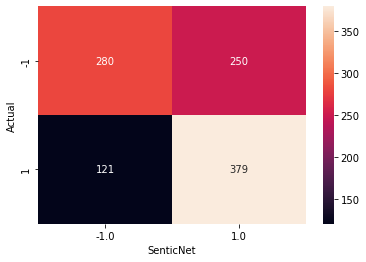

In [28]:
confusion_matrix = pd.crosstab(f3['Polarity Judge'], f3['Polarity SenticNet'], rownames=['Actual'], colnames=['SenticNet'])
print (confusion_matrix)
sn.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

SenticNet  -1.0  1.0   All
Actual                    
-1          280  250   530
1           121  379   500
All         401  629  1030


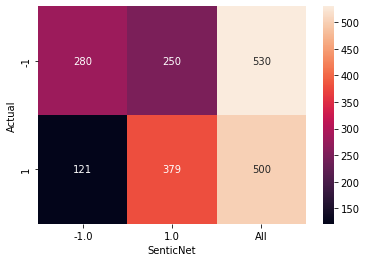

In [29]:
confusion_matrix = pd.crosstab(f3['Polarity Judge'], f3['Polarity SenticNet'], rownames=['Actual'], colnames=['SenticNet'], margins = True)
print (confusion_matrix)
confusion_matrix = confusion_matrix.drop('All', axis=0)
sn.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

<AxesSubplot:xlabel='SenticNet', ylabel='Actual'>

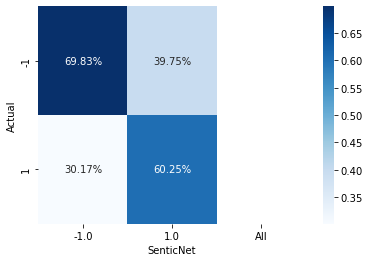

In [30]:
sn.heatmap(confusion_matrix/np.sum(confusion_matrix.drop("All", axis=1)), annot=True, 
            fmt='.2%', cmap='Blues')

In [31]:
from sklearn.metrics import classification_report

In [32]:
y_true = polarity_judge2.copy()
y_pred = polarity_senticnet.copy()
target_names = ['class -1', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    class -1       0.70      0.53      0.60       530
     class 1       0.60      0.76      0.67       500

    accuracy                           0.64      1030
   macro avg       0.65      0.64      0.64      1030
weighted avg       0.65      0.64      0.64      1030



In [33]:
from sklearn.metrics import confusion_matrix



In [34]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)

[[280 250]
 [121 379]]


In [35]:
import seaborn as sns
import numpy as np

<AxesSubplot:>

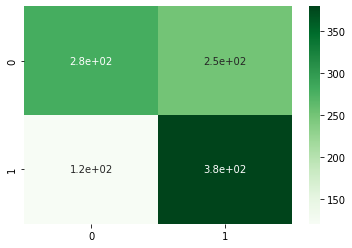

In [36]:
sns.heatmap(cf_matrix, annot=True, cmap='Greens')

<AxesSubplot:>

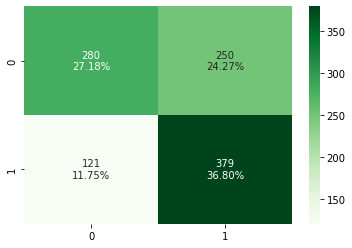

In [37]:
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [38]:
confusion_matrix(y_true, y_pred)

array([[280, 250],
       [121, 379]])

In [39]:
from matplotlib.ticker import PercentFormatter

In [40]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [41]:
pip install pretty-confusion-matrix

Keyring is skipped due to an exception: 'str' object has no attribute 'name'
Note: you may need to restart the kernel to use updated packages.


In [42]:
from pretty_confusion_matrix import pp_matrix

In [43]:
from pretty_confusion_matrix import pp_matrix_from_data

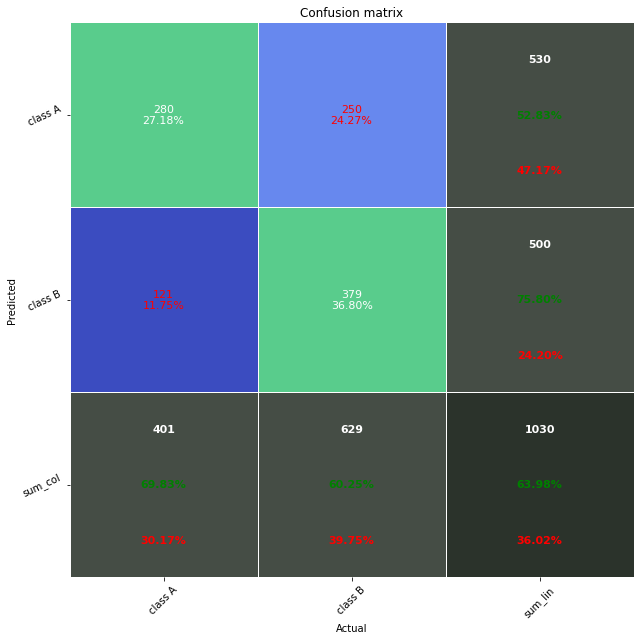

<Figure size 432x288 with 0 Axes>

In [44]:
cmap='Greens'
;
y_test = np.array(y_true)
predic = np.array(y_pred)
pp_matrix_from_data(predic,y_test, cmap='coolwarm')
plt.savefig('MQD_CM')

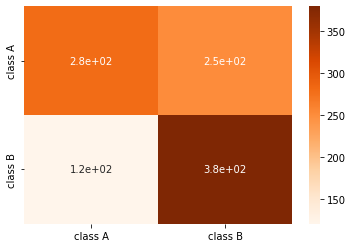

In [45]:
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn


y_test = y_true
predic = y_pred

columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

confm = confusion_matrix(y_test, predic)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True)